In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

Generate Data

In [2]:
#generate some data
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

In [3]:
X

array([[ 5.66419349e-02,  6.30322398e-02, -1.63175074e-02,
         2.63839310e-01],
       [-2.15303008e-01,  1.32960730e+00, -3.28186994e+00,
        -9.28855467e-01],
       [-3.46820399e-01, -3.44615233e-01, -2.26355638e-01,
        -5.24893162e-01],
       [-4.72863402e-01,  1.38938235e+00, -4.13836148e+00,
        -1.26898057e+00],
       [-9.07937179e-01, -1.08907844e+00, -6.39538672e-01,
        -7.49030228e-01],
       [-7.36654921e-01,  2.51288698e-01, -2.99971689e+00,
        -1.29169930e+00],
       [ 4.58422071e-01,  1.22734906e+00, -1.13592444e+00,
        -7.49884107e-02],
       [-1.58537629e+00, -1.49398666e-01, -4.34133762e+00,
        -2.40245174e+00],
       [-9.88413316e-01, -3.39732815e-01, -2.16858330e+00,
        -1.30762371e+00],
       [-3.49005842e-01, -3.66811709e-01, -3.61073143e-01,
        -2.16515829e-01],
       [-5.48968838e-01,  6.21499056e-01, -2.98255731e+00,
        -1.15057717e+00],
       [-1.24134628e+00, -2.46626335e-01, -3.22463605e+00,
      

In [4]:
#each feature will have zero mean
X = X - np.mean(X, axis=0)

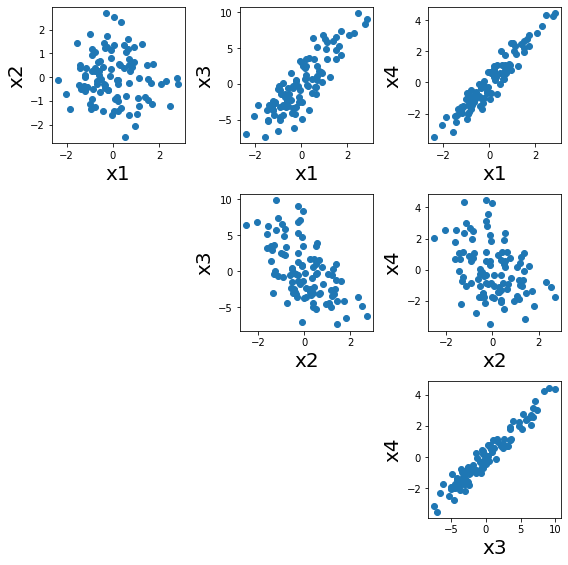

In [5]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(X[:,i], X[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

Observations:

x1 and x2 do not seem correlated

x1 seems very correlated with both x3 and x4

x2 seems somewhat correlated with both x3 and x4

x3 and x4 seem very correlated

Apply PCA

In [6]:
#initialize
pca = PCA(n_components=4)

#fit
pca.fit(X)

PCA(n_components=4)

In [7]:
#get principal components
principal_comps_builtin = pca.components_.T

In [8]:
#print each principal component
for i,component in enumerate(pca.components_):
    print(f'principal component {i}')
    print(component)
    print()

principal component 0
[ 0.21308798 -0.12596748  0.88920341  0.38476357]

principal component 1
[ 0.48056924  0.79774881 -0.1464467   0.33347175]

principal component 2
[-0.17286636 -0.32098984 -0.3731955   0.85311656]

principal component 3
[-0.83292493  0.4946661   0.22044451  0.11377928]



Can we do this by hand?

Principal components are the eigenvectors of the covariance matrix

In [9]:
#compute covariance matrix
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100

In [10]:
cov_matrix

array([[ 1.12461301, -0.07593912,  3.52082586,  1.73746109],
       [-0.07593912,  1.02258137, -2.25899197, -0.62259965],
       [ 3.52082586, -2.25899197, 15.04783049,  6.44174948],
       [ 1.73746109, -0.62259965,  6.44174948,  2.94576157]])

In [11]:
#eigenvalues and eigenvectors of covariance matrix
eigvecs = np.linalg.eig(cov_matrix)

In [12]:
#sort order by magnitude of eigenvalue
ordering = np.argsort(eigvecs[0])[::-1]

In [13]:
#get eigenvectors
principal_comps_byhand = eigvecs[1][:,ordering]

In [14]:
#our by-hand eigenvectors
principal_comps_byhand

array([[ 0.21308798, -0.48056924, -0.17286636, -0.83292493],
       [-0.12596748, -0.79774881, -0.32098984,  0.4946661 ],
       [ 0.88920341,  0.1464467 , -0.3731955 ,  0.22044451],
       [ 0.38476357, -0.33347175,  0.85311656,  0.11377928]])

In [ ]:
#results from built-in call
principal_comps_builtin

array([[-0.22353436,  0.48095492, -0.22186745,  0.81822344],
       [ 0.10921136,  0.8004701 , -0.28241719, -0.51726302],
       [-0.88872809, -0.16098757, -0.35318643, -0.2439359 ],
       [-0.38505538,  0.31939472,  0.86387193, -0.05869119]])

In [ ]:
import numpy as np
from sklearn import decomposition
import pandas as pd

In [ ]:
df1= pd.DataFrame({
        'X1':[10,2,8,9,12],
        'X2':[20,5,17,20,22],
        'X3':[10,2,7,10,11]})

In [ ]:
df1

,X1,X2,X3
0,10,20,10
1,2,5,2
2,8,17,7
3,9,20,10
4,12,22,11


In [ ]:
pca = decomposition.PCA(n_components=3)

In [ ]:
pca

PCA(n_components=3)

In [ ]:
#find eigen values and eigen vectors of covariance matrix of df
pca.fit(df1)

PCA(n_components=3)

In [ ]:
#convert all the data points from standard basis to eigen vector basis
df1_pca = pca.transform(df1)


In [ ]:
df1_pca

array([[-4.17288843e+00, -1.98923940e-04, -2.58847587e-01],
       [ 1.46146195e+01, -1.71937350e-01, -2.51663442e-01],
       [ 3.51842744e-01,  1.00363798e-01,  9.72694089e-01],
       [-3.73883152e+00,  8.99599868e-01, -3.03082462e-01],
       [-7.05474229e+00, -8.27827393e-01, -1.59100599e-01]])

In [ ]:
#variance of data along original axes
np.var(df1.X1) + np.var(df1.X2) + np.var(df1.X3)

59.519999999999996

In [ ]:
#variance of data along principal component axes
#show eigen values of covariance matrix in decreasing order
np.sum(pca.explained_variance_)

74.40000000000002

In [ ]:
#understand how much variance captured by each principal component
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[73.71803604  0.38355337  0.29841058]
[0.99083382 0.00515529 0.00401089]
[0.99083382 0.99598911 1.        ]


In [ ]:
#show the principal components
#show eighen vectors of covariance matrix of df
pca.components_[0]
pca.components_[1]
pca.components_[2]

array([ 0.04423488,  0.45128105, -0.89128486])

In [ ]:
pca.components_[0]

array([-0.43405692, -0.79486757, -0.42400487])

In [ ]:
#specify number of required dimensions as n_components
pca = decomposition.PCA(n_components=2)
pca.fit(df1)
pca.explained_variance_
pca.components_[0]
pca.components_[1]
df1_pca = pca.transform(df1)

In [ ]:
df1_pca

array([[-4.17288843e+00, -1.98923940e-04],
       [ 1.46146195e+01, -1.71937350e-01],
       [ 3.51842744e-01,  1.00363798e-01],
       [-3.73883152e+00,  8.99599868e-01],
       [-7.05474229e+00, -8.27827393e-01]])